---
title: "Chapter 2 Select Solutions"
author: "Alex Yaroslavskiy"
toc: true
number-sections: true
highlight-style: pygments
format: 
  html: 
    code-fold: true
  pdf: 
    geometry: 
      - top=30mm
      - left=20mm
  docx: default
jupyter: python3
---

## Chapter 2
### Multi-armed Bandits

This chapter aims to discuss the fundamental RL problem, called the 'Multi-armed Bandit', a reference to a slot machine with multiple levers. The goal here is to discuss and examine techniques for solving the problem in which a fixed number of decisions at every time interval combine to a final reward, which we aim to maximize. 

In [12]:
#some imports, including a user-defined solver
import GreedyAgent
import importlib
importlib.reload(GreedyAgent)
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Notation

$t$ = time step.

$A_t$ = action selected at $t$.

$R_t$ = reward at time $t$.

$q_*(a)$ = expected reward of arbitrary action $a$. Defined by: 
$$ q_*(a) = \mathbb{E}[R_t|A_t =a ] $$

$Q_t(a)$ = estimated value of action $a$ at time $t$.



### Action-value Methods

Since the value of each possible is action is not always (or ever) known at each time step $t$, there is a need to find the best technique by which to estimate the rewards from actions, and thus to decide which actions to take. The collection of such estimations are called *action-value methods*. 

This simplest action selection rule is to select the action with the highest-observed value. This is called the greedy action, and this method can be summarized as

$$ A_t = \text{argmax}_a Q_t(a).$$

As an alternative, we define the $\epsilon$-greedy method, which says that with some small probability $\epsilon$, we choose an action from all available actions uniformally at random, and otherwise we act greedily. Following are a few problems from chapter 2 that explore the $\epsilon$-greedy method.

## Exercises
### Exercise 2.1

In $\epsilon$-greedy action selection, for the case of two actions and $\epsilon=.5$, what is the probability that the greedy action is selected?

#### Solution
For this, we use law of total probablity. Let $a_g$ be the event that the greedy action is selected, and let $a_\epsilon$ be the event that the action is selected at random. Then
$$ P(a_g) = P(a_g|a_\epsilon)\cdot P(a_\epsilon) + P(a_g|a_\epsilon ')\cdot P(a_\epsilon')$$
$$ = \frac{1}{2}\cdot\frac{1}{2}+1\cdot\frac{1}{2} = \frac14$$

### Exercise 2.2

Consider a $k$-armed bandit problem with $k=4$ actions, denoted 1,2,3,4. Consider applying an $\epsilon$-greedy action selection, using sample-average action-value estimates, and initial estimates of $Q_1(a) = 0$ for all $a$. Suppose an initial sequence of actions and rewards is given by:

$A_1 = 1, R_1 = -1$

$A_2 = 2, R_2 = 1$

$A_3 = 2, R_3 = -2$

$A_4 = 2, R_4 = 2$

$A_5 = 3, R_5 = 0$

On which time steps did the $\epsilon$ case definitely occur? On which time steps could this have possible occurred? 

#### Solution
Answering the second part first, the $\epsilon$ case could have occurred at every time step. 

There is no way to determine if it occurred at time step 1, since each action-value estimate is equal at 0 at that point.

At time step 2, action 2 could have been a legal choice of the greedy algorithm, so again we cannot know which case occurred.

At time step 3, action 2 is the most rewarding action thus far. It again could have been the result of either case.

At time step 4, action 2 is now the second-least rewarding action, behind actions 3 and 4. Thus, we know for certain that the $\epsilon$ case occurred here. 

At time step 5, action 2 has returned to being the most rewarding action, with an expected payout of $\frac13$. Thus, since action 3 was chosen, we know that the $\epsilon$ case occurred.

### Exercise 2.3
In the comparison shown in Figure 2.2 (seen on page 30 in the textbook and recreated below), which method will perform best in the long run in terms of cumulative reward and probability of selecting the best action? How much better will it be? Express your answer quantitatively.

#### Solution

The key observation to make is that both epsilon-greedy algorithms will eventually find the optimal action (this follows from the Kolmogorov 0-1 Law). Thus, in the long run, the epsilon-greedy algorithm with $\epsilon = 0.1$ will select the optimal action $90\%$ of the time. The epsilon-greedy algorithm with $\epsilon = .01$ will select the optimal action $99\%$ of the time, $10\%$ more frequently. Determining the actual long-term efficiency improvement would require knowing the distribution of each reward, but could otherwise be calculated.

In [5]:
num_steps = 1000
num_runs = 2000
rewards = np.zeros((num_runs, num_steps))
actions = np.zeros((num_runs, num_steps))

for run in (range(num_runs)):
    agent_run = GreedyAgent.GreedyAgent(0, 10, epsilon = 0)
    np.random.seed(run)
    for step in range(num_steps):
        action, reward = agent_run.agent_step()
        rewards[run, step] = reward
        if action == agent_run.q_star_means.argmax():
            actions[run, step] = 1
        
greedy_scores_epsilon_000 = np.mean(rewards, axis=0)
action_optimals_000 = np.mean(actions, axis = 0)

actions = np.zeros((num_runs, num_steps))
for run in (range(num_runs)):
    agent_run = GreedyAgent.GreedyAgent(0, 10, epsilon = .1)
    np.random.seed(run)
    for step in range(num_steps):
        action, reward = agent_run.agent_step()
        rewards[run, step] = reward
        if action == agent_run.q_star_means.argmax():
            actions[run, step] = 1
            
greedy_scores_epsilon_010 = np.mean(rewards, axis=0)
action_optimals_010 = np.mean(actions, axis = 0)

actions = np.zeros((num_runs, num_steps))
for run in (range(num_runs)):
    agent_run = GreedyAgent.GreedyAgent(0, 10, epsilon = .01)
    np.random.seed(run)
    for step in range(num_steps):
        action, reward = agent_run.agent_step()
        rewards[run, step] = reward
        if action == agent_run.q_star_means.argmax():
            actions[run, step] = 1
            
greedy_scores_epsilon_001 = np.mean(rewards, axis=0)
action_optimals_001 = np.mean(actions, axis = 0)



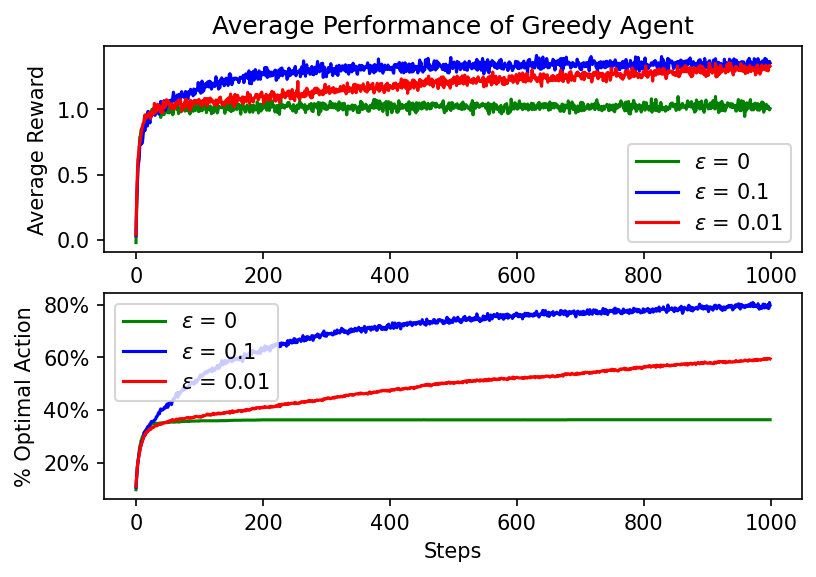

In [18]:
#| label: figure 2.2
#| fig-cap: A recreation of figure 2.2, showing average rewards over 2000 runs of different valued epsilon-greedy solvers
figs, axs = plt.subplots(2,1, dpi=150)
raxs = axs.ravel()

ax = raxs[0]

ax.plot(greedy_scores_epsilon_000, color='g', label='$\epsilon$ = 0')
ax.plot(greedy_scores_epsilon_010, color='b', label='$\epsilon$ = 0.1')
ax.plot(greedy_scores_epsilon_001, color='r', label='$\epsilon$ = 0.01')
ax.legend()
ax.set(
    title = "Average Performance of Greedy Agent",
    xlabel = "Steps",
    ylabel = "Average Reward"
)

ax = raxs[1]

ax.plot(action_optimals_000, color='g', label='$\epsilon$ = 0')
ax.plot(action_optimals_010, color='b', label='$\epsilon$ = 0.1')
ax.plot(action_optimals_001, color='r', label='$\epsilon$ = 0.01')
ax.legend()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
ax.set(
    #title = "Average Greediness of Greedy Agent",
    xlabel = "Steps",
    ylabel = "% Optimal Action"
);

### Exercise 2.4
If the step-size parameters, $\alpha_n$, are not constant, then the estimate $Q_n$ is a weighted average of previously received rewards with a weighting different from that given by (2.6). What is the weighting on each prior reward for the general case, analogous to (2.6), in terms of the sequence of step-size parameters?

For reference, eq. (2.6) is provided here.

$$ Q_{n+1} = Q_n + \alpha\big[R_n - Q_n\big]$$
$$=(1-\alpha)^n Q_1 + \sum_{i=1}^n \alpha(1-\alpha)^{n-i}R_i$$

#### Solution

Let $\{a_n\}$ be a sequence of step-size parameters, such that $Q_{n+1} = Q_n + \alpha_n\big[R_n - Q_n\big]$. Then

$Q_{n+1} = \alpha_n R_n + (1-\alpha_n)Q_n$ <br>
$\qquad = \alpha_n R_n + (1-\alpha_n)[\alpha_{n-1} R_{n-1} + (1-\alpha_{n-1})Q_{n-1}]$ <br>
$\qquad = \alpha_n R_n + (1-\alpha_n)[\alpha_{n-1} R_{n-1} + (1-\alpha_{n-1})[\alpha_{n-2} R_{n-2} + (1-\alpha_{n-2})Q_{n-2}]]$ <br>
$\qquad = \Pi_{i=1}^n (1-\alpha_i)Q_1 + \sum_{i=1}^n [\Pi_{j=i}^{n-1} (1-\alpha_{j})]\alpha_{i-1}R_{i-1} + \alpha_n R_n$.

### Exercise 2.5
Design and conduct an experiment to demonstrate the diffculties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the $q_*(a)$ on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, $\alpha$ = 0.1. Use $\epsilon$ = 0.1 and longer runs, say of 10,000 steps.

#### Solution

In [43]:
num_steps = 10000
num_runs = 2000
rewards = np.zeros((num_runs, num_steps))
actions = np.zeros((num_runs, num_steps))

for run in (range(num_runs)):
    agent_run = GreedyAgent.GreedyAgent(0, 10, epsilon = .1, reward_structure=1)
    np.random.seed(run)
    for step in range(num_steps):
        action, reward = agent_run.agent_step()
        rewards[run, step] = reward
        if action == agent_run.q_star_means.argmax():
            actions[run, step] = 1
            
greedy_scores_sample_averages = np.mean(rewards, axis=0)
action_optimals_sample_averages = np.mean(actions, axis = 0)

actions = np.zeros((num_runs, num_steps))

for run in (range(num_runs)):
    agent_run = GreedyAgent.GreedyAgent(0, 10, epsilon = .1, reward_structure=1, step_size=.1)
    np.random.seed(run)
    for step in range(num_steps):
        action, reward = agent_run.agent_step()
        rewards[run, step] = reward
        if action == agent_run.q_star_means.argmax():
            actions[run, step] = 1
        
greedy_scores_constant_step = np.mean(rewards, axis=0)
action_optimals_constant_step = np.mean(actions, axis = 0)


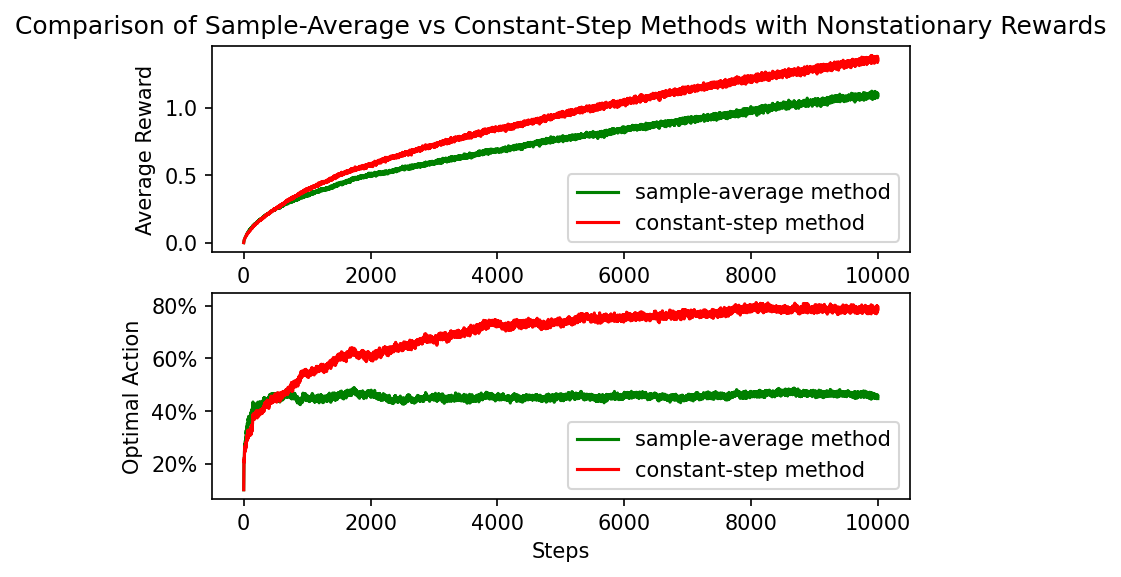

In [44]:
#| label: Solution 2.5
#| fig-cap: Using $\epsilon$-greedy methods with sample-average approaches underperform compared to constant-step methods on nonstationary reward problems. 

figs, axs = plt.subplots(2,1, dpi=150)
raxs = axs.ravel()
ax = raxs[0]

ax.plot(greedy_scores_sample_averages, color='g', label='sample-average method')
ax.plot(greedy_scores_constant_step, color='r', label='constant-step method')
ax.legend()
ax.set(
    title = "Comparison of Sample-Average vs Constant-Step Methods with Nonstationary Rewards",
    xlabel = "Steps",
    ylabel = "Average Reward"
)
ax = raxs[1]

ax.plot(action_optimals_sample_averages, color='g', label='sample-average method')
ax.plot(action_optimals_constant_step, color='r', label='constant-step method')
ax.legend()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
ax.set(
    #title = "Average Greediness of Greedy Agent",
    xlabel = "Steps",
    ylabel = "Optimal Action"
);

## References
Sutton, R. S., Barto, A. G. (2018 ). Reinforcement Learning: An Introduction. The MIT Press. 